In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import string
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
#!pip install unidecode
import unidecode
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tensorflow.keras.layers import TextVectorization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Dropout, MaxPool2D, GlobalAvgPool2D, GlobalMaxPool2D
from tensorflow.keras.layers import GlobalAvgPool1D, GlobalMaxPool1D
from sklearn.model_selection import train_test_split
#!pip install tensorflow-addons
#import tensorflow_addons as tfa

#from wordcloud import WordCloud
#import gensim
#import spacy
#import pyLDAvis
#import pyLDAvis.gensim
#from gensim.models import CoherenceModel

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\karth\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
http

## Connecting to MongoDB

In [2]:
# importing the required libraries
import pymongo
import pprint
import json

# connect to the mongoclient
client = pymongo.MongoClient('mongodb://localhost:27017')

# get the database
db = client['cvedb']

collection = db.get_collection('cves')

## Loading all cves to a dataframe

In [3]:
import pandas as pd

cursor = collection.find()

df = pd.DataFrame(list(cursor))
df

,_id,id,assigner,Published,Modified,last-modified,summary,access,impact,cvss3,...,products,vulnerable_product_stems,vulnerable_configuration_stems,cwe,vulnerable_configuration_cpe_2_2,impact3,exploitability3,cvss3-vector,impactScore3,exploitabilityScore3
0,6211d7cc1291c8f278e33ed1,CVE-1999-0006,cve@mitre.org,1998-07-14 04:00:00,2008-09-09 12:33:00,2008-09-09 12:33:00,Buffer overflow in POP servers based on BSD/Qu...,"{'authentication': 'NONE', 'complexity': 'LOW'...","{'availability': 'COMPLETE', 'confidentiality'...",NaN,...,[qpopper],[cpe:2.3:a:qualcomm:qpopper],[cpe:2.3:a:qualcomm:qpopper],NVD-CWE-Other,[],NaN,NaN,NaN,NaN,NaN
1,6211d7cc1291c8f278e33ed2,CVE-2003-0011,cve@mitre.org,2003-03-24 05:00:00,2018-10-12 21:32:00,2018-10-12 21:32:00,Unknown vulnerability in the DNS intrusion det...,"{'authentication': 'NONE', 'complexity': 'LOW'...","{'availability': 'PARTIAL', 'confidentiality':...",NaN,...,[isa_server],[cpe:2.3:a:microsoft:isa_server],[cpe:2.3:a:microsoft:isa_server],NVD-CWE-Other,[],NaN,NaN,NaN,NaN,NaN
2,6211d7cc1291c8f278e33ed3,CVE-2008-0001,secalert@redhat.com,2008-01-15 20:00:00,2018-10-15 21:56:00,2018-10-15 21:56:00,"VFS in the Linux kernel before 2.6.22.16, and ...","{'authentication': 'NONE', 'complexity': 'LOW'...","{'availability': 'PARTIAL', 'confidentiality':...",NaN,...,[linux_kernel],[cpe:2.3:o:linux:linux_kernel],[cpe:2.3:o:linux:linux_kernel],NVD-CWE-Other,[],NaN,NaN,NaN,NaN,NaN
3,6211d7cc1291c8f278e33ed4,CVE-2003-0013,cve@mitre.org,2003-01-17 05:00:00,2016-10-18 02:28:00,2016-10-18 02:28:00,The default .htaccess scripts for Bugzilla 2.1...,"{'authentication': 'NONE', 'complexity': 'LOW'...","{'availability': 'PARTIAL', 'confidentiality':...",NaN,...,[bugzilla],[cpe:2.3:a:mozilla:bugzilla],[cpe:2.3:a:mozilla:bugzilla],NVD-CWE-Other,[],NaN,NaN,NaN,NaN,NaN
4,6211d7cc1291c8f278e33ed5,CVE-2004-0009,cve@mitre.org,2004-03-03 05:00:00,2017-10-10 01:30:00,2017-10-10 01:30:00,"Apache-SSL 1.3.28+1.52 and earlier, with SSLVe...","{'authentication': 'NONE', 'complexity': 'LOW'...","{'availability': 'PARTIAL', 'confidentiality':...",NaN,...,[apache-ssl],[cpe:2.3:a:apache-ssl:apache-ssl],[cpe:2.3:a:apache-ssl:apache-ssl],NVD-CWE-Other,[],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180959,6211da333987c0d017e0a3fd,CVE-2022-0632,security@huntr.dev,2022-02-19 14:15:00,2022-02-19 14:15:00,2022-02-19 14:15:00,NULL Pointer Dereference in Homebrew mruby pri...,{},{},NaN,...,[],[],[],CWE-476,[],NaN,NaN,NaN,NaN,NaN
180960,6211da333987c0d017e0a3ff,CVE-2022-0678,security@huntr.dev,2022-02-19 11:15:00,2022-02-19 11:15:00,2022-02-19 11:15:00,Cross-site Scripting (XSS) - Reflected in Pack...,{},{},NaN,...,[],[],[],CWE-79,[],NaN,NaN,NaN,NaN,NaN
180961,6211da333987c0d017e0a403,CVE-2022-0690,security@huntr.dev,2022-02-19 17:15:00,2022-02-19 17:15:00,2022-02-19 17:15:00,Cross-site Scripting (XSS) - Reflected in Pack...,{},{},NaN,...,[],[],[],CWE-79,[],NaN,NaN,NaN,NaN,NaN
180962,6211da333987c0d017e0a404,CVE-2022-0689,security@huntr.dev,2022-02-19 16:15:00,2022-02-19 16:15:00,2022-02-19 16:15:00,Use multiple time the one-time coupon in Packa...,{},{},NaN,...,[],[],[],CWE-840,[],NaN,NaN,NaN,NaN,NaN


## Loading cves of vendor ciso to a dataframe

In [4]:
import pandas as pd

cursor = collection.find({'vendors':['cisco']})

cisco_df = pd.DataFrame(list(cursor))
cisco_df

,_id,id,assigner,Published,Modified,last-modified,summary,access,impact,cvss3,...,products,vulnerable_product_stems,vulnerable_configuration_stems,cwe,vulnerable_configuration_cpe_2_2,impact3,exploitability3,cvss3-vector,impactScore3,exploitabilityScore3
0,6211d7cc1291c8f278e33f0f,CVE-2008-0027,psirt@cisco.com,2008-01-17 03:00:00,2018-10-15 21:57:00,2018-10-15 21:57:00,Heap-based buffer overflow in the Certificate ...,"{'authentication': 'NONE', 'complexity': 'LOW'...","{'availability': 'COMPLETE', 'confidentiality'...",NaN,...,"[unified_callmanager, unified_communications_m...","[cpe:2.3:a:cisco:unified_callmanager, cpe:2.3:...","[cpe:2.3:a:cisco:unified_callmanager, cpe:2.3:...",CWE-119,[],NaN,NaN,NaN,NaN,NaN
1,6211d7cccaa888fa42e33eec,CVE-2008-0028,psirt@cisco.com,2008-01-23 21:00:00,2018-10-26 14:19:00,2018-10-26 14:19:00,Unspecified vulnerability in Cisco PIX 500 Ser...,"{'authentication': 'NONE', 'complexity': 'MEDI...","{'availability': 'COMPLETE', 'confidentiality'...",NaN,...,"[pix_firewall_software, adaptive_security_appl...","[cpe:2.3:o:cisco:pix_firewall_software, cpe:2....","[cpe:2.3:o:cisco:pix_firewall_software, cpe:2....",NVD-CWE-Other,[],NaN,NaN,NaN,NaN,NaN
2,6211d7cccaa888fa42e33f46,CVE-1999-0158,cve@mitre.org,1998-08-31 04:00:00,2018-10-30 16:25:00,2018-10-30 16:25:00,Cisco PIX firewall manager (PFM) on Windows NT...,"{'authentication': 'NONE', 'complexity': 'LOW'...","{'availability': 'NONE', 'confidentiality': 'P...",NaN,...,[pix_firewall_software],[cpe:2.3:o:cisco:pix_firewall_software],[cpe:2.3:o:cisco:pix_firewall_software],NVD-CWE-Other,[],NaN,NaN,NaN,NaN,NaN
3,6211d7cccaa888fa42e33f64,CVE-1999-0293,cve@mitre.org,1998-01-01 05:00:00,2008-09-09 12:34:00,2008-09-09 12:34:00,AAA authentication on Cisco systems allows att...,"{'authentication': 'NONE', 'complexity': 'LOW'...","{'availability': 'PARTIAL', 'confidentiality':...",NaN,...,[ios],[cpe:2.3:o:cisco:ios],[cpe:2.3:o:cisco:ios],NVD-CWE-Other,[],NaN,NaN,NaN,NaN,NaN
4,6211d7cccaa888fa42e33f6a,CVE-2009-0057,psirt@cisco.com,2009-01-22 18:30:00,2017-08-08 01:33:00,2017-08-08 01:33:00,The Certificate Authority Proxy Function (CAPF...,"{'authentication': 'NONE', 'complexity': 'MEDI...","{'availability': 'PARTIAL', 'confidentiality':...",NaN,...,[unified_communications_manager],[cpe:2.3:a:cisco:unified_communications_manager],[cpe:2.3:a:cisco:unified_communications_manager],CWE-20,[],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,6211d8bd7c0f71ed10e368d4,CVE-2021-34785,psirt@cisco.com,2021-09-09 05:15:00,2021-09-17 15:25:00,2021-09-17 15:25:00,Multiple vulnerabilities in Cisco BroadWorks C...,"{'authentication': 'SINGLE', 'complexity': 'LO...","{'availability': 'PARTIAL', 'confidentiality':...",7.2,...,[broadworks_commpilot_application_software],[cpe:2.3:a:cisco:broadworks_commpilot_applicat...,[cpe:2.3:a:cisco:broadworks_commpilot_applicat...,CWE-287,[],"{'availability': 'HIGH', 'confidentiality': 'H...","{'attackvector': 'NETWORK', 'attackcomplexity'...",CVSS:3.1/AV:N/AC:L/PR:H/UI:N/S:U/C:H/I:H/A:H,5.9,1.2
5426,6211d8bd7c0f71ed10e368d7,CVE-2021-34795,psirt@cisco.com,2021-11-04 16:15:00,2021-11-06 02:58:00,2021-11-06 02:58:00,Multiple vulnerabilities in the web-based mana...,"{'authentication': 'NONE', 'complexity': 'LOW'...","{'availability': 'PARTIAL', 'confidentiality':...",9.8,...,"[catalyst_pon_switch_cgp-ont-1p_firmware, cata...",[cpe:2.3:o:cisco:catalyst_pon_switch_cgp-ont-1...,[cpe:2.3:o:cisco:catalyst_pon_switch_cgp-ont-1...,CWE-798,[],"{'availability': 'HIGH', 'confidentiality': 'H...","{'attackvector': 'NETWORK', 'attackcomplexity'...",CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,5.9,3.9
5427,6211d8a0caa888fa42e365cd,CVE-2020-3467,psirt@cisco.com,2020-10-08 05:15:00,2020-10-16 16:16:00,2020-10-16 16:16:00,A vulnerability in the web-based management in...,"{'authentication': 'SINGLE', 'complexity': 'LO...","{'availability': 'PARTIAL', 'confidentiality':...",7.7,...,[identity_service

## Data Cleaning

In [7]:
cisco_df.isna().sum()

_id                                    0
id                                     0
assigner                               0
Published                              0
Modified                               0
last-modified                          0
summary                                0
access                                 0
impact                                 0
cvss3                               2396
cvss                                   0
exploitabilityScore                    0
impactScore                            0
cvss-time                              0
cvss-vector                            0
references                             0
vulnerable_configuration               0
vulnerable_product                     0
vendors                                0
products                               0
vulnerable_product_stems               0
vulnerable_configuration_stems         0
cwe                                    0
vulnerable_configuration_cpe_2_2       0
impact3         

In [8]:
# Checking if duplicates are there
~len(cisco_df.id.drop_duplicates())==len(cisco_df)

False

## Word cloud

In [27]:
text = cisco_df.summary
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined

### Checking for keywords

In [9]:
cisco_df.summary.str.contains('hardware', case=False).sum()

41

In [10]:
cisco_df.summary.str.contains('firmware', case=False).sum()

142

In [11]:
cisco_df.summary.str.contains('chip', case=False).sum()

8

## Labeling

In [12]:
cisco_df_m = cisco_df[['id', 'summary']].copy()
cisco_df_m.loc[cisco_df.summary.str.contains('hardware', case=False) |\
             cisco_df.summary.str.contains('firmware', case=False) |\
             cisco_df.summary.str.contains('chip', case=False), ['target']] = 1

cisco_df_m.fillna(0, inplace=True)
cisco_df_m.target = cisco_df_m.target.astype(np.int32)
cisco_df_m

,id,summary,target
0,CVE-2008-0027,Heap-based buffer overflow in the Certificate ...,0
1,CVE-2008-0028,Unspecified vulnerability in Cisco PIX 500 Ser...,0
2,CVE-1999-0158,Cisco PIX firewall manager (PFM) on Windows NT...,0
3,CVE-1999-0293,AAA authentication on Cisco systems allows att...,0
4,CVE-2009-0057,The Certificate Authority Proxy Function (CAPF...,0
...,...,...,...
5425,CVE-2021-34785,Multiple vulnerabilities in Cisco BroadWorks C...,0
5426,CVE-2021-34795,Multiple vulnerabilities in the web-based mana...,0
5427,CVE-2020-3467,A vulnerability in the web-based management in...,0
5428,CVE-2020-3468,A vulnerability in the web-based management in...,0


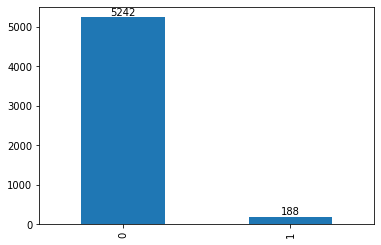

In [13]:
p = cisco_df_m.target.value_counts()

ax = p.plot.bar()

for container in ax.containers:
    ax.bar_label(container)

## Preparing the data

In [15]:
class prepare_text_data:
    def __init__(self, data, text_column):
        self.vocabulary = None
        self.data = data
        self.text_column = text_column
    
    def clean_text(self, text, stemming='PorterStemmer', rm_stopwords=True):
        """Standization / cleaning the text"""
        #Removing punctuation
        text = ''.join((c for c in text if c not in string.punctuation))
        #Convert to Lower case
        text = text.lower()
        #Remove special characters
        text = unidecode.unidecode(text)
        #Removing stopwords (commonly spoken words) and apply stemming technique (for example: studying and studies are same words that is study)
        if stemming == 'PorterStemmer':
            stem = PorterStemmer()
            if rm_stopwords:
                text = "".join((stem.stem(word) for word in text if word not in set(stopwords.words('english'))))
            else:
                text = "".join((stem.stem(word) for word in text))
        elif stemming == 'Lemmatizer':
            stem = WordNetLemmatizer()
            if rm_stopwords:
                text = "".join((stem.lemmatize(word) for word in text if word not in set(stopwords.words('english'))))
            else:
                text = "".join((stem.lemmatize(word) for word in text))

        return text
    
    def clean_data(self, stemming='PorterStemmer', rm_stopwords=True):
        """recieves the dataframe of text column and maps it to the clean_text function to clean text by text"""
        self.data[self.text_column] = self.data[self.text_column].map(lambda x: self.clean_text(x, stemming, rm_stopwords))
        
        return self.data[self.text_column]
        
        
    def get_vocabulary(self):
        return self.vocabulary
    
    def text_vectorization(self, 
                            max_tokens=20000,
                            output_sequence_length=500,
                            ngrams = 1,
                           output_mode = 'int'
                          ):
        """Text vectorization using keras"""
        text_vectorization = TextVectorization(max_tokens = max_tokens, 
                                               ngrams=ngrams, 
                                               output_sequence_length=output_sequence_length, 
                                               output_mode=output_mode)
        text_vectorization.adapt(self.data[[self.text_column]].to_numpy())
        """Vocabulary stored as a object variable"""
        self.vocabulary = text_vectorization.get_vocabulary()
        
        return text_vectorization(self.data[[self.text_column]].to_numpy()).numpy()
    
    
if __name__ == '__main__':
    #nltk.download()
    df_final = cisco_df_m.copy()
    o = prepare_text_data(df_final, 'summary')
    df_final['summary'] = o.clean_data('PorterStemmer')

    X = o.text_vectorization(max_tokens=20000, output_sequence_length=500, ngrams=2)
    # transform target to one-hot encoded data
    y = tf.keras.utils.to_categorical(df_final[['target']], num_classes=2)
    #y = df_final[['target']]
    vocabulary = o.get_vocabulary()

In [16]:
vocabulary

['',
 '[UNK]',
 'n',
 'he',
 'cker',
 'f',
 'cc',
 'llw',
 'cul',
 'vulnerbl',
 'n he',
 'h',
 'evce',
 'ffece',
 'cul llw',
 'expl',
 'ree',
 'e',
 'ree cker',
 'b',
 'r',
 'ervce',
 'fwre',
 'h vulnerbl',
 'n ffece',
 'n cc',
 'vulnerbl n',
 'llw n',
 'cue',
 'bug',
 'nerfce',
 'n cker',
 'fr',
 'ue',
 'uer',
 'ffece evce',
 'he cker',
 're',
 'llw ree',
 'k',
 'rbrr',
 'v',
 'cker cul',
 'cul expl',
 'f he',
 'llw he',
 'befre',
 'expl cul',
 'k bug',
 'expl h',
 'crfe',
 'f ervce',
 'enl',
 'enl f',
 'cn',
 'cker cue',
 'vulnerble',
 'ngeen',
 'ucceful',
 'f cc',
 'vulnerbl b',
 'ucceful expl',
 'execue',
 'wh',
 'he vulnerbl',
 'uhence',
 'he ffece',
 'vulnerbl ue',
 'cce',
 'execue rbrr',
 'cue enl',
 'ere',
 'ce',
 'p',
 'nfrn',
 'unuhence',
 'pcke',
 'webbe',
 'n unuhence',
 'cnn',
 'ngeen nerfce',
 'he webbe',
 'fle',
 'web',
 'reque',
 'n n',
 'prvlege',
 'cker execue',
 'webbe ngeen',
 'enng',
 'n uhence',
 'unuhence ree',
 'nerfce f',
 'b enng',
 'npu',
 'vln',
 'rel',
 'he

## Splitting the data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                    stratify = y, 
                                                    shuffle=True,
                                                    random_state=42
                                                   )

## Model

In [18]:
def model(input_dim,
          output_dim,
          input_length,
          num_units = 256,
          num_lstm_layers = 1,
          dropout_rate = 0.4,
          recurrent_dropout = 0,
          pooling = False,
          pooling_type = 'global_avg',
          num_hidden_layers = 0,
          num_dense_units = 64,
          dense_dropout = 0.2,
          optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
         ):
    
    model = Sequential()
    
    #Embedding layer to embed the text vectors as an encoded data so, it can be input for the model
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length)) 
    
    #LSTM block
    for i in range(num_lstm_layers):
          model.add(LSTM(num_units, dropout=dropout_rate, 
                         #activation='tanh', 
                     #recurrent_activation='sigmoid',
                     recurrent_dropout=recurrent_dropout, 
                     #use_bias=True, unroll=False,
                     return_sequences=True))
    
    #Pooling layers to reduce dimentions and so, to reduce parameters
    if pooling:
        if pooling_type=='global_avg':
            model.add(GlobalAvgPool1D())
        if pooling_type=='global_max':
            model.add(GlobalMaxPool1D())
    else:
    #Flattening the 2D array to 1D before passing to Fully-Connected network or to the output layer
      model.add(Flatten())
    
    #Fully-Connected layers
    for i in range(num_hidden_layers):
        model.add(Dense(num_dense_units, activation='relu'))
        model.add(Dropout(dense_dropout))
    model.add(Dense(2, activation="softmax")) #Using one node as ouput

    #Compiling the model (for backpropogation)
    model.compile(
        loss = tf.keras.metrics.categorical_crossentropy, #tf.keras.metrics.BinaryCrossentropy, 
        optimizer = optimizer,
        metrics = ["accuracy"] #, tfa.metrics.F1Score(2)
    )
    
    return model

input_dim = len(vocabulary) #Size of the vocabulary i.e. maximum integer index + 1
#df['text'].apply(lambda x: len(x)).max()+1
output_dim = 10 #Dimention of the dense embedding layer

input_length = X_train.shape[-1] #number of columns after vectorization should be provided here

tf.keras.backend.clear_session()

model = model(input_dim=input_dim, 
              output_dim=output_dim, 
              num_lstm_layers=1,
              input_length=input_length, 
              pooling=False,
              num_hidden_layers=1)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 10)           200000    
                                                                 
 lstm (LSTM)                 (None, 500, 256)          273408    
                                                                 
 flatten (Flatten)           (None, 128000)            0         
                                                                 
 dense (Dense)               (None, 64)                8192064   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 8,665,602
Trainable params: 8,665,602
Non-

## Training

In [19]:
EPOCHS = 10
BATCH_SIZE = 64

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="lstm2.h5",
                                            save_best_only=True,
                                            monitor='val_loss')
#tf.keras.backend.clear_session()

history = model.fit(X_train, 
                    y_train, 
                    validation_split=0.2,
                    shuffle=True, 
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE, 
                    verbose=1,
                    #callbacks=[checkpoint]
                   )

Epoch 1/10
55/55 [==============================] - 12s 91ms/step - loss: 0.1848 - accuracy: 0.9586 - val_loss: 0.1227 - val_accuracy: 0.9712
Epoch 2/10
55/55 [==============================] - 5s 83ms/step - loss: 0.1206 - accuracy: 0.9640 - val_loss: 0.0927 - val_accuracy: 0.9712
Epoch 3/10
55/55 [==============================] - 5s 82ms/step - loss: 0.0655 - accuracy: 0.9643 - val_loss: 0.0667 - val_accuracy: 0.9712
Epoch 4/10
55/55 [==============================] - 5s 83ms/step - loss: 1.0816 - accuracy: 0.9747 - val_loss: 0.0725 - val_accuracy: 0.9747
Epoch 5/10
55/55 [==============================] - 4s 81ms/step - loss: 0.0641 - accuracy: 0.9799 - val_loss: 0.0624 - val_accuracy: 0.9804
Epoch 6/10
55/55 [==============================] - 4s 82ms/step - loss: 0.0339 - accuracy: 0.9879 - val_loss: 0.0523 - val_accuracy: 0.9873
Epoch 7/10
55/55 [==============================] - 5s 84ms/step - loss: 0.0302 - accuracy: 0.9908 - val_loss: 0.0756 - val_accuracy: 0.9816
Epoch 8/10
5

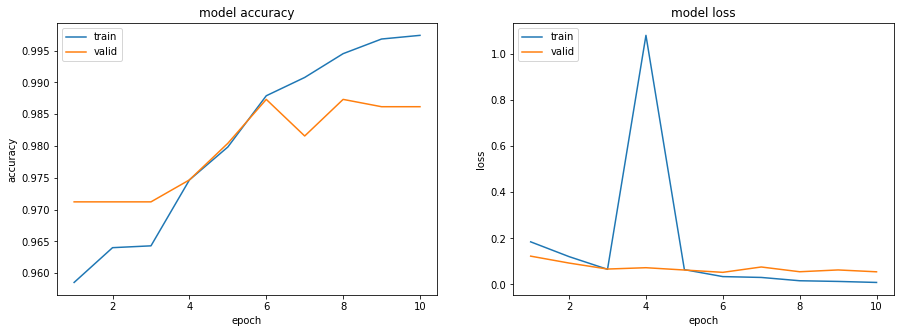

In [20]:
def plot_train_val_accuracy_n_loss(history, Range=2.0):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    for ax, j in zip(axes, ['accuracy', 'loss']):
        # summarize history for accuracy and loss
        ax.plot(range(1, len(history.history[j]) + 1), history.history[j])
        ax.plot(range(1, len(history.history['val_'+j]) + 1), history.history['val_'+j])
        ax.set_title("model "+j)
        ax.set_ylabel(j)
        ax.set_xlabel('epoch')
        ax.set_xticks(np.arange(2,EPOCHS+1, Range))
        ax.legend(['train', 'valid'], loc='upper left')
    plt.show()
        
plot_train_val_accuracy_n_loss(history)

## Testing

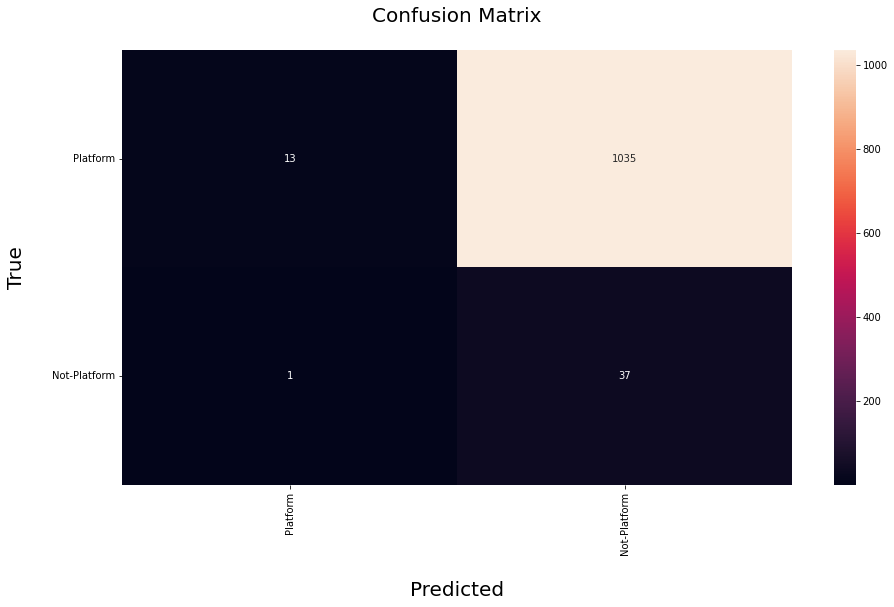

Test Accuracy:  0.04604051565377532
Test F1-Score:  0.025958180298474336


In [21]:
model = tf.keras.models.load_model("lstm.h5")

# Changinge one hot encoded data back to labels
y_pred = np.argmax(model.predict(X_test), axis=1) 
y_true = np.argmax(y_test, axis=1)

# Class Labels
class_names = ['Platform', 'Not-Platform']

# Plotting Confusion matrix
cm = confusion_matrix(y_true, y_pred)

def plot_confusion_matrix(cm, class_names=class_names):
    # Plot confusion matrix in a beautiful manner
    fig = plt.figure(figsize=(15, 8))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('\nPredicted', fontsize=20)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(class_names, fontsize = 10)
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True\n', fontsize=20)
    ax.yaxis.set_ticklabels(class_names, fontsize = 10)
    plt.yticks(rotation=0)

    plt.title('Confusion Matrix\n', fontsize=20)
    plt.show()

plot_confusion_matrix(cm)

print("Test Accuracy: ",accuracy_score(y_true, y_pred))
#Getting zero if average is not weighted as some calculations leaading to non-integers.
print("Test F1-Score: ",f1_score(y_true, y_pred, average='weighted')) 